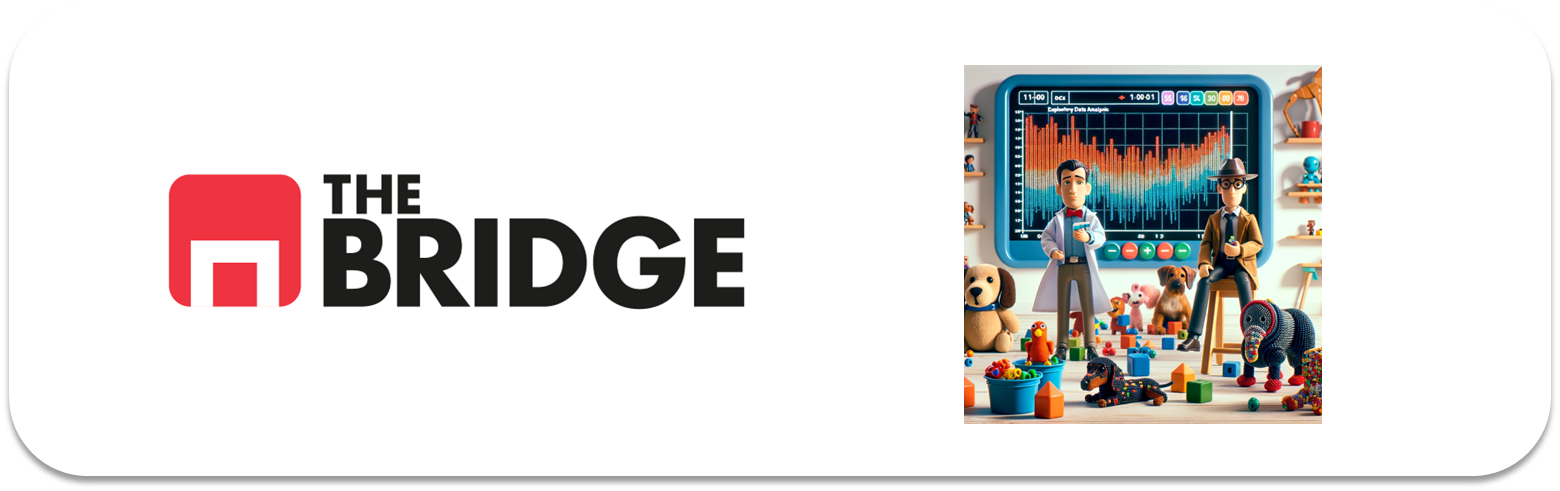

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [165]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

from bootcampviztools import pinta_distribucion_categoricas, plot_categorical_relationship_fin, plot_categorical_numerical_relationship,plot_combined_graphs, plot_grouped_boxplots,plot_grouped_histograms, grafico_dispersion_con_correlacion, bubble_plot, mostrar_diagramas_violin, plot_multiple_boxplots, scatter_plots_agrupados


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [166]:
df_titanic = pd.read_csv(r"C:\Users\patri\REPO_PRUEBA\ONLINE_DS_THEBRIDGE_Patricia_Diez\Sprint_07\unidad_2\practica\titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [167]:
df_titanic = df_titanic.drop(["deck", "survived", "pclass"], axis = 1)
df_titanic

,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [168]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]
df_titanic

,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True,0
887,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True,0
888,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False,3
889,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,0


In [169]:
df_titanic = df_titanic.drop(["parch", "sibsp"], axis=1)
df_titanic

,sex,age,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,S,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,C,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,S,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,S,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,S,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,S,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,S,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,C,First,man,True,Cherbourg,yes,True,0


In [170]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   embarked        889 non-null    object 
 4   class           891 non-null    object 
 5   who             891 non-null    object 
 6   adult_male      891 non-null    bool   
 7   embark_town     889 non-null    object 
 8   alive           891 non-null    object 
 9   alone           891 non-null    bool   
 10  family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(6)
memory usage: 64.5+ KB


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [171]:
df_titanic["embark_town"] = df_titanic["embark_town"].fillna(df_titanic["embark_town"].mode().iloc[0])
df_titanic

,sex,age,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,S,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,C,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,S,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,S,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,S,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,S,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,S,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,C,First,man,True,Cherbourg,yes,True,0


In [172]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   embarked        889 non-null    object 
 4   class           891 non-null    object 
 5   who             891 non-null    object 
 6   adult_male      891 non-null    bool   
 7   embark_town     891 non-null    object 
 8   alive           891 non-null    object 
 9   alone           891 non-null    bool   
 10  family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(6)
memory usage: 64.5+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [173]:
df_titanic["age"] = df_titanic["age"].fillna(df_titanic["age"].mean)
df_titanic

,sex,age,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,S,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,C,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,S,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,S,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,S,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,S,First,woman,False,Southampton,yes,True,0
888,female,<bound method Series.mean of 0 22.0\n1 ...,23.4500,S,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,C,First,man,True,Cherbourg,yes,True,0


In [174]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    object 
 2   fare            891 non-null    float64
 3   embarked        889 non-null    object 
 4   class           891 non-null    object 
 5   who             891 non-null    object 
 6   adult_male      891 non-null    bool   
 7   embark_town     891 non-null    object 
 8   alive           891 non-null    object 
 9   alone           891 non-null    bool   
 10  family_members  891 non-null    int64  
dtypes: bool(2), float64(1), int64(1), object(7)
memory usage: 64.5+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

-Tanto en terminos absolutos como relativos, sobreviven más mujeres

-Sí existe una relacion entre a variable "sex", y la variable "alive"

-Sí hay relacion entre ser adulto o niño y sobrevivir 

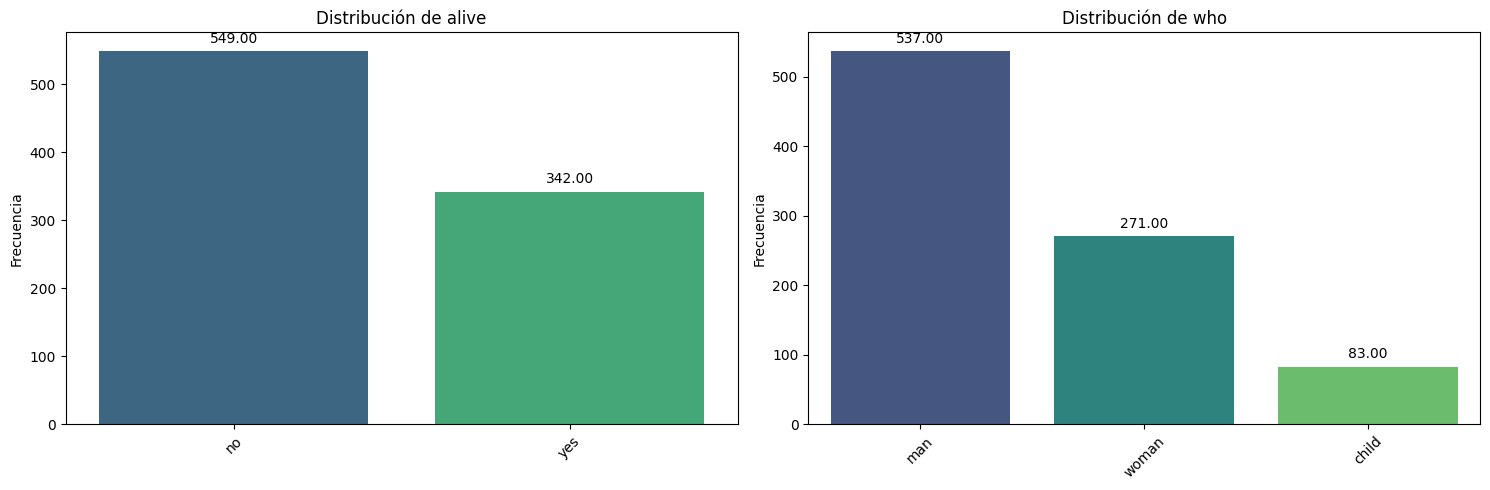

In [175]:
#tengo que combinar alive y who. son una bivariante y una categorica 

pinta_distribucion_categoricas(df_titanic, ["alive", "who"], mostrar_valores=True)


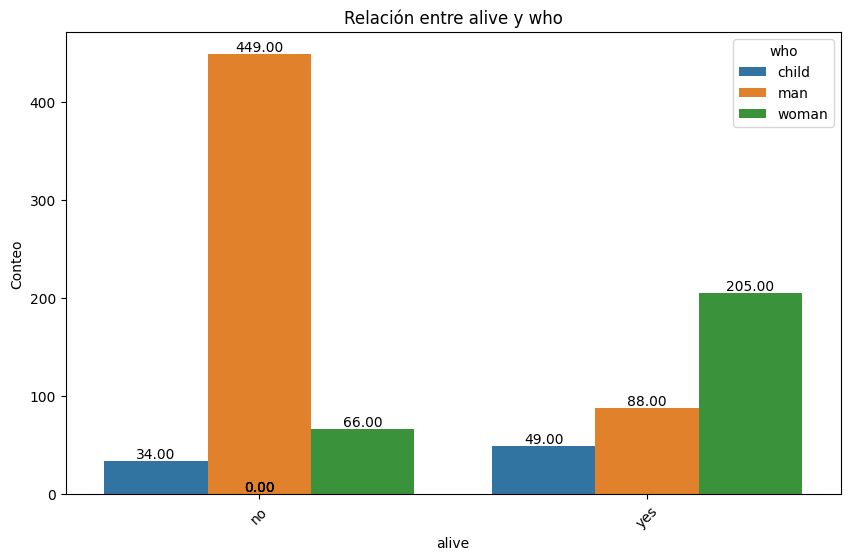

In [176]:
plot_categorical_relationship_fin(df_titanic, 'alive', 'who', relative_freq=False, show_values=True)
#en terminos absolutos sobrevivieron más mujeres 

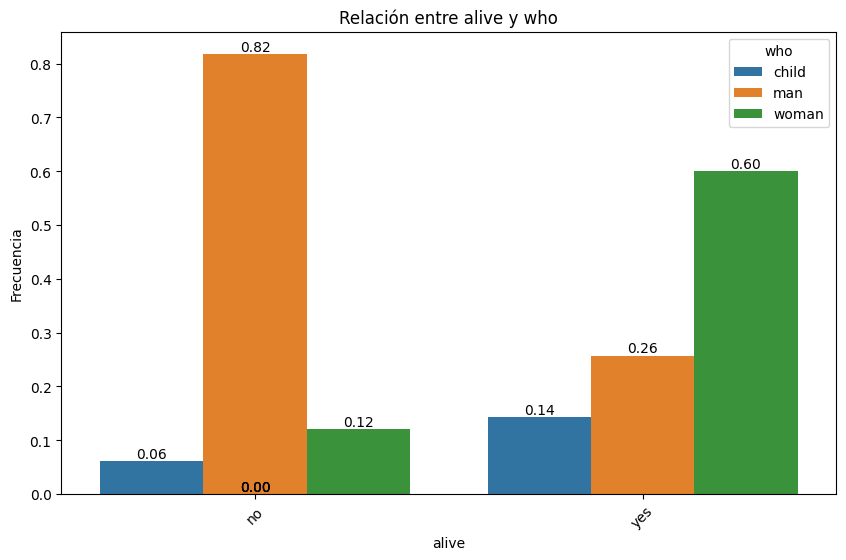

In [177]:
plot_categorical_relationship_fin(df_titanic, 'alive', 'who', relative_freq=True, show_values=True)
#y en terminos relativos tambien sobrevivieron mas mujeres

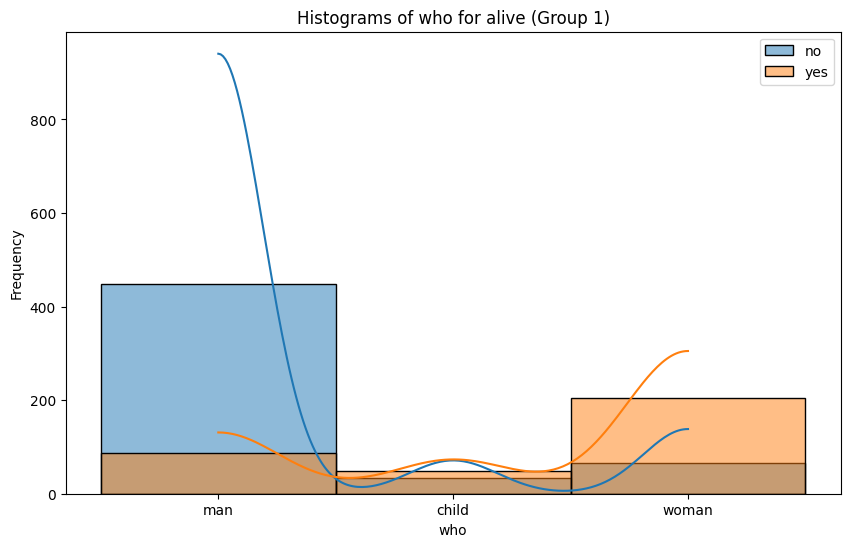

In [178]:
plot_grouped_histograms(df_titanic, "alive", "who", group_size=2)

In [179]:
# Convertir las columnas a tipo 'category'
df_titanic['sex'] = df_titanic['sex'].astype('category')
df_titanic["alive"] = df_titanic["alive"].astype("category")

In [180]:
from scipy.stats import mannwhitneyu

grupo_a = df_titanic.loc[df_titanic.alive == "no"]["sex"]
grupo_b = df_titanic.loc[df_titanic.alive == "yes"]["sex"]

In [181]:
# Convertir las variables categóricas a códigos numéricos
grupo_a = grupo_a.cat.codes
grupo_b = grupo_b.cat.codes

In [182]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   sex             891 non-null    category
 1   age             891 non-null    object  
 2   fare            891 non-null    float64 
 3   embarked        889 non-null    object  
 4   class           891 non-null    object  
 5   who             891 non-null    object  
 6   adult_male      891 non-null    bool    
 7   embark_town     891 non-null    object  
 8   alive           891 non-null    category
 9   alone           891 non-null    bool    
 10  family_members  891 non-null    int64   
dtypes: bool(2), category(2), float64(1), int64(1), object(5)
memory usage: 52.6+ KB


In [183]:
print(grupo_a.dtypes)
print(grupo_b.dtypes)

int8
int8


In [184]:
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadistico U:", u_stat)
print("Valor p:", p_valor)

#Rechazamos la hipotesis nula, por lo que sí hay una relacion entre las dos variables

Estadistico U: 143986.5
Valor p: 4.315906231881016e-59


In [185]:
from scipy.stats import mannwhitneyu

df_titanic['who'] = df_titanic['who'].astype('category')
df_titanic["alive"] = df_titanic["alive"].astype("category")

grupo_a = df_titanic.loc[df_titanic.alive == "no"]["who"]
grupo_b = df_titanic.loc[df_titanic.alive == "yes"]["who"]

grupo_a = grupo_a.cat.codes
grupo_b = grupo_b.cat.codes

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadistico U:", u_stat)
print("Valor p:", p_valor)

#Rechazamos la hipotesis nula, sí hay relacion entre ser adulto o niño y sobrevivir 

Estadistico U: 58397.0
Valor p: 6.554149908778008e-28


2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

-Tanto en terminos absolutos como relativos, sobrevivieron más pasajeros de primera clase

-Sí hay relación entre la clase y la supervivencia

c:\Users\patri\REPO_PRUEBA\ONLINE_DS_THEBRIDGE_Patricia_Diez\Sprint_07\unidad_2\practica\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


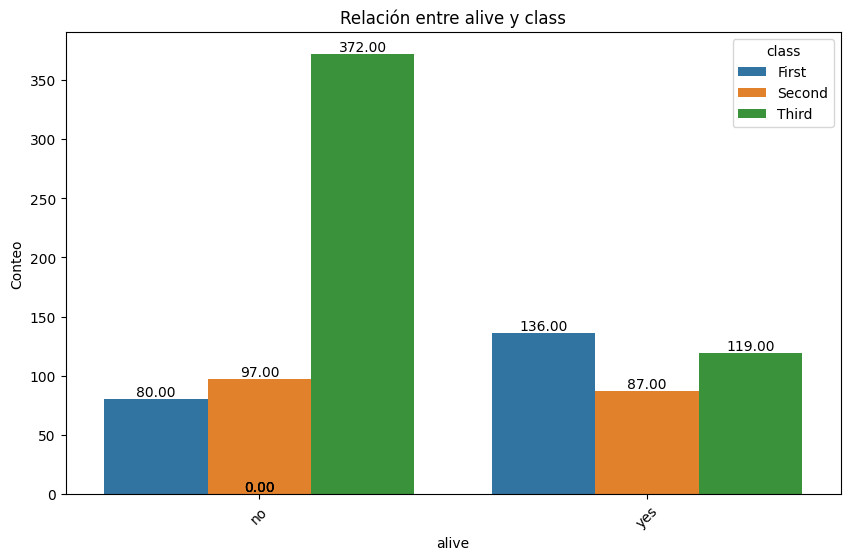

In [186]:
plot_categorical_relationship_fin(df_titanic, 'alive', 'class', relative_freq=False, show_values=True)

c:\Users\patri\REPO_PRUEBA\ONLINE_DS_THEBRIDGE_Patricia_Diez\Sprint_07\unidad_2\practica\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


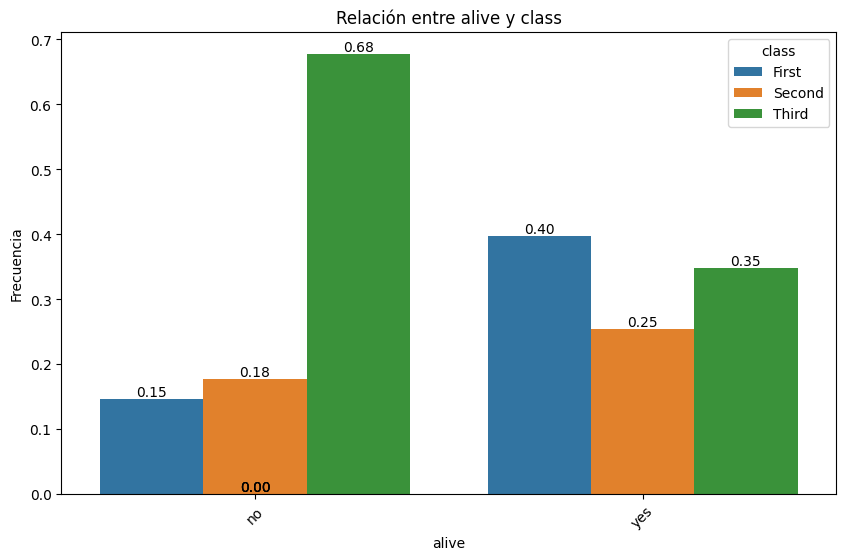

In [187]:
plot_categorical_relationship_fin(df_titanic, 'alive', 'class', relative_freq=True, show_values=True)

In [188]:
from scipy.stats import mannwhitneyu

df_titanic['class'] = df_titanic['class'].astype('category')
df_titanic["alive"] = df_titanic["alive"].astype("category")

grupo_a = df_titanic.loc[df_titanic.alive == "no"]["class"]
grupo_b = df_titanic.loc[df_titanic.alive == "yes"]["class"]

grupo_a = grupo_a.cat.codes
grupo_b = grupo_b.cat.codes

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadistico U:", u_stat)
print("Valor p:", p_valor)

#Rechazamos la hipotesis nula, sí hay relación


Estadistico U: 127941.5
Valor p: 3.938774603560551e-24


3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

- En general tanto sobrevirvir como no, Southampton es mucho más grande que las otras dos ciudades, por lo que imtuyo que en ese puerto embracó mucha más gente que en los otros dos 

- Sí hay relación entre el puerto y los supervivientes 

c:\Users\patri\REPO_PRUEBA\ONLINE_DS_THEBRIDGE_Patricia_Diez\Sprint_07\unidad_2\practica\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


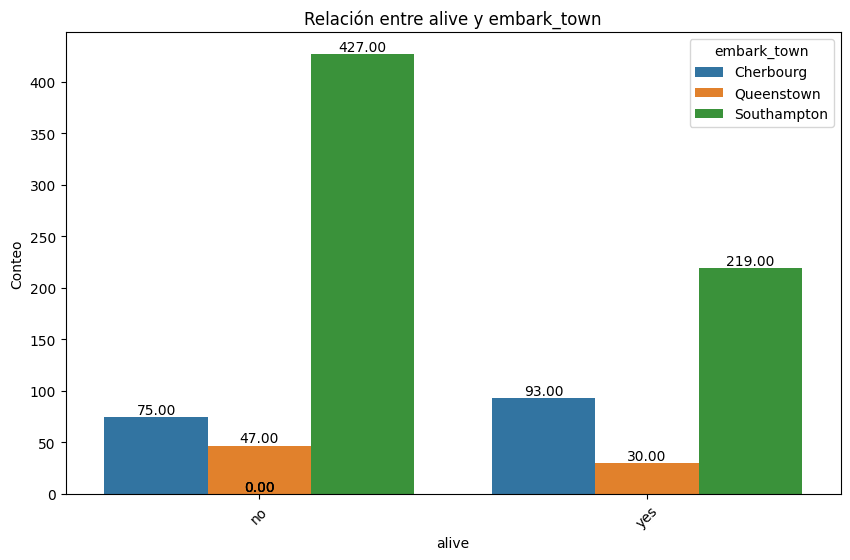

In [189]:
plot_categorical_relationship_fin(df_titanic, 'alive', 'embark_town', relative_freq=False, show_values=True)

c:\Users\patri\REPO_PRUEBA\ONLINE_DS_THEBRIDGE_Patricia_Diez\Sprint_07\unidad_2\practica\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


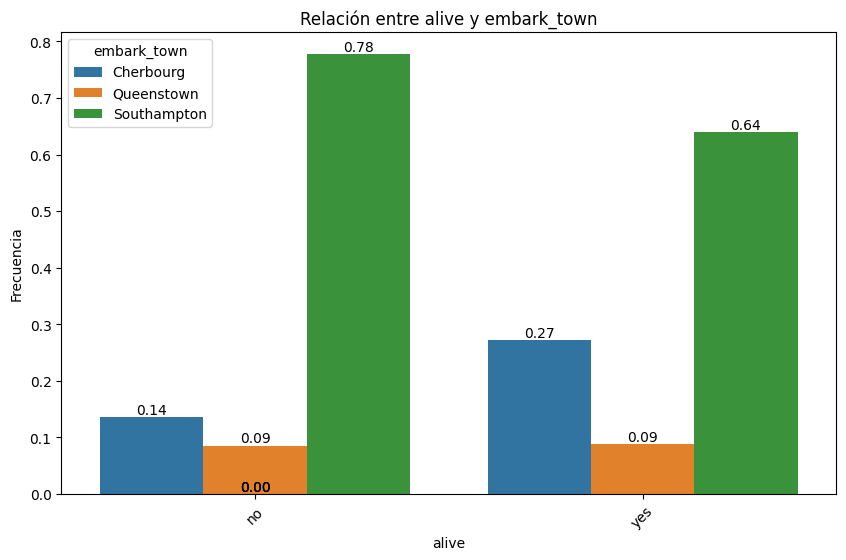

In [190]:
plot_categorical_relationship_fin(df_titanic, 'alive', 'embark_town', relative_freq=True, show_values=True)

In [191]:
from scipy.stats import mannwhitneyu

df_titanic['embark_town'] = df_titanic['embark_town'].astype('category')
df_titanic["alive"] = df_titanic["alive"].astype("category")

grupo_a = df_titanic.loc[df_titanic.alive == "no"]["embark_town"]
grupo_b = df_titanic.loc[df_titanic.alive == "yes"]["embark_town"]

grupo_a = grupo_a.cat.codes
grupo_b = grupo_b.cat.codes

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadistico U:", u_stat)
print("Valor p:", p_valor)

#Rechazamos la hipotesis nula, sí hay relación

Estadistico U: 107841.0
Valor p: 1.7621467793774173e-06


4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

La gente que de media, pagó un pasaje más caro, fue la gente que más sobrevivió

c:\Users\patri\REPO_PRUEBA\ONLINE_DS_THEBRIDGE_Patricia_Diez\Sprint_07\unidad_2\practica\bootcampviztools.py:109: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].mean()


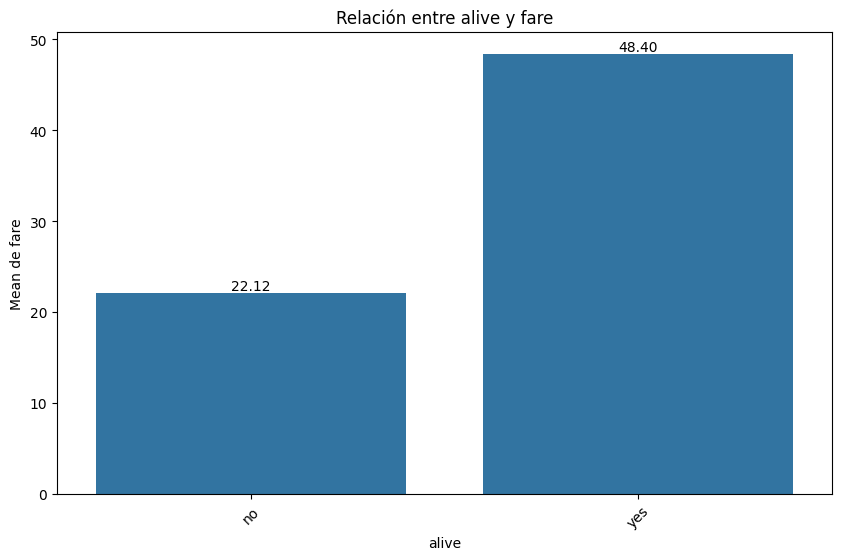

In [192]:
plot_categorical_numerical_relationship(df_titanic, "alive", "fare", show_values=True, measure="mean")

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

- Igual o no saben lo que pagaron o se colaron?

- Sobrevivió

In [193]:
pasajero_max_pago = df_titanic.loc[df_titanic['fare'].idxmax()]
print(pasajero_max_pago)

sex                  female
age                    35.0
fare               512.3292
embarked                  C
class                 First
who                   woman
adult_male            False
embark_town       Cherbourg
alive                   yes
alone                  True
family_members            0
Name: 258, dtype: object


6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

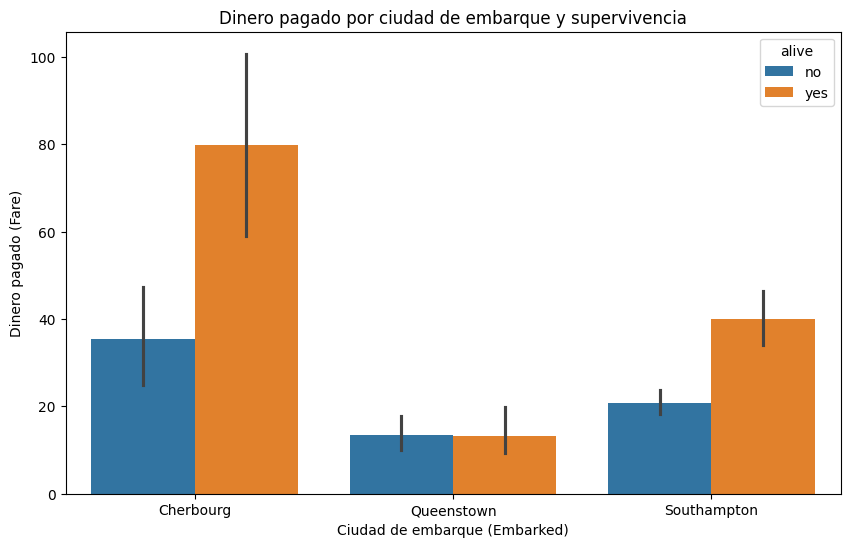

In [194]:
#numerica, categorica, categorica 

# Gráfico de barras agrupado
plt.figure(figsize=(10, 6))
sns.barplot(x='embark_town', y='fare', hue='alive', data=df_titanic)
plt.title('Dinero pagado por ciudad de embarque y supervivencia')
plt.ylabel('Dinero pagado (Fare)')
plt.xlabel('Ciudad de embarque (Embarked)')
plt.show()

En Cherbourg, parece haber una relación clara entre pagar más dinero por el billete y la supervivencia, lo que podría sugerir que los pasajeros de mayor clase social o con mayores recursos tenían más probabilidades de sobrevivir.

En Southampton, la diferencia, aunque hay un poco, no es tan grande

En Queenstown, no hay casi diferencia

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [199]:
df_titanic["age"] = df_titanic["age"].fillna(df_titanic["age"].mean())

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [204]:
df_air_jun = pd.read_csv(r"C:\Users\patri\REPO_PRUEBA\ONLINE_DS_THEBRIDGE_Patricia_Diez\Sprint_07\unidad_2\practica\dataset_viajes_jun23.csv")
df_air_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


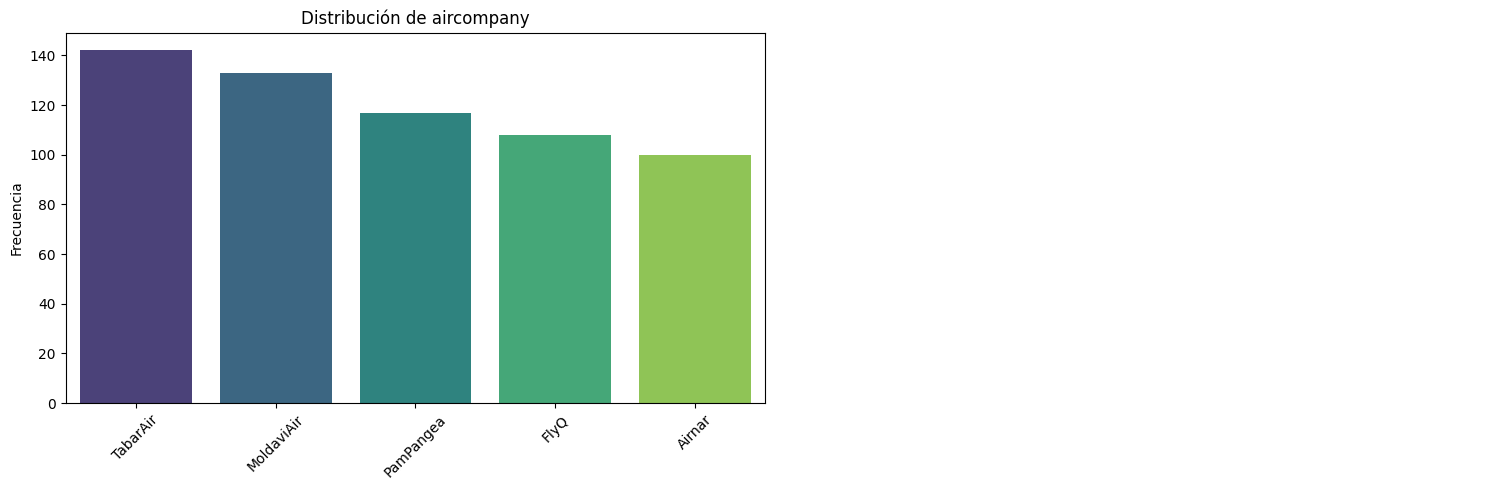

In [209]:
pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa=False) #viajes por compañia

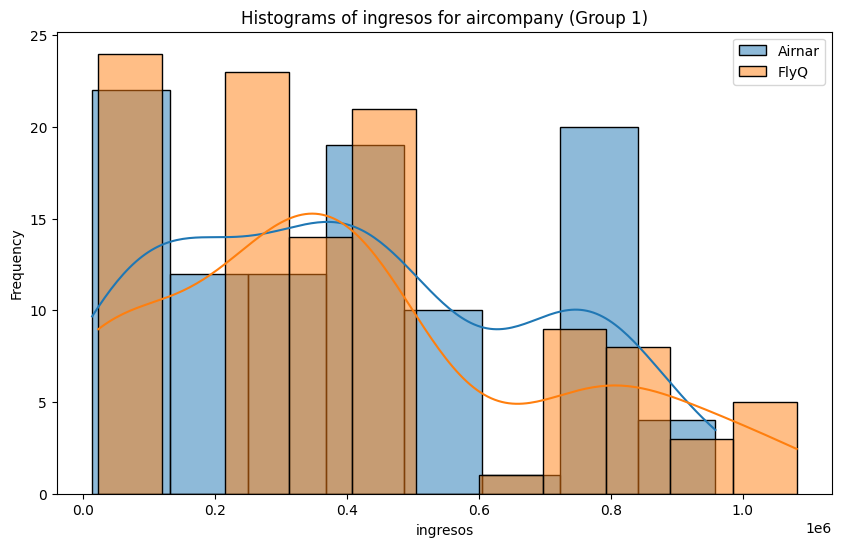

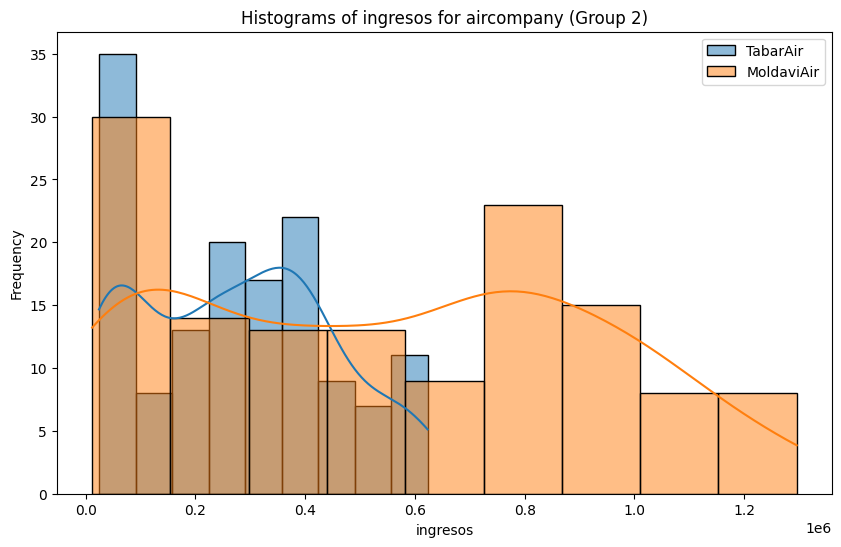

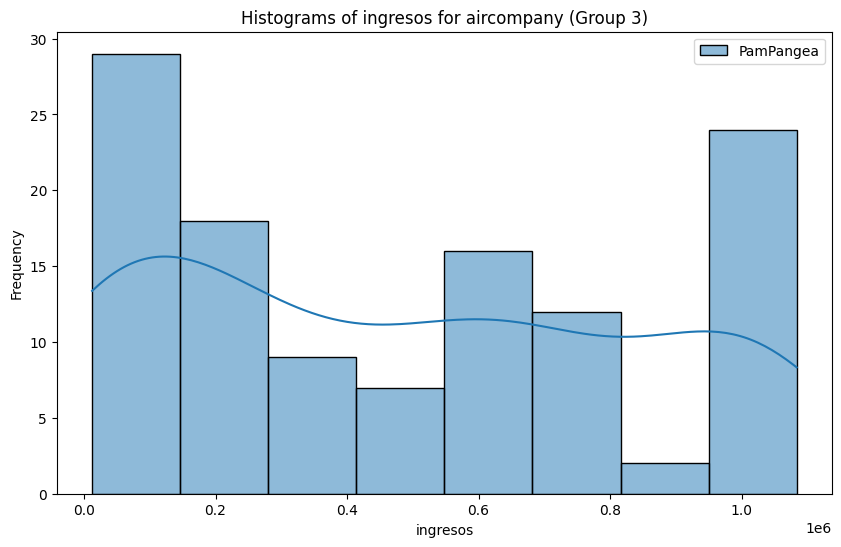

In [210]:
plot_grouped_histograms(df_air_jun, "aircompany","ingresos",group_size= 2)

la situacion llamativa es que hay compañías con ingresos mayores que otras, habiendo hecho menos viajes

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

In [223]:
col_directora = "aircompany"
col_1 = "ingresos"
col_2 = "distancia"
diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta Airnar:


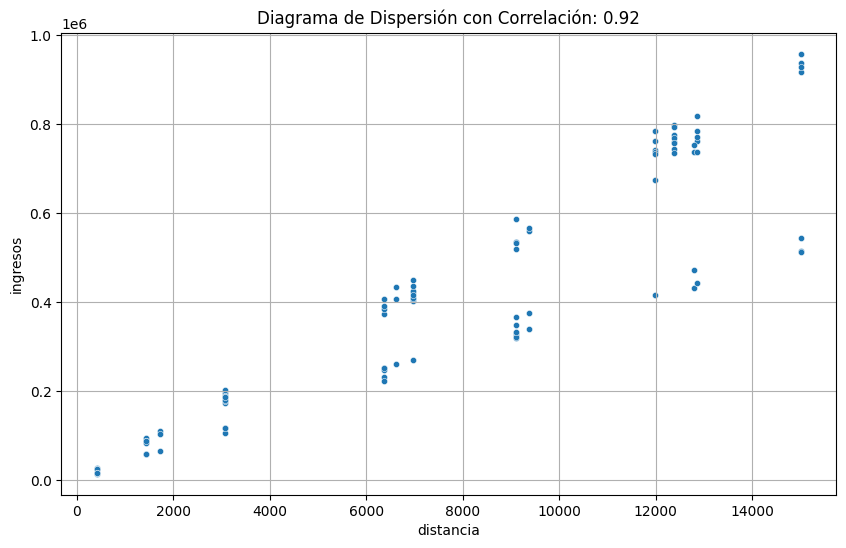

Respuesta FlyQ:


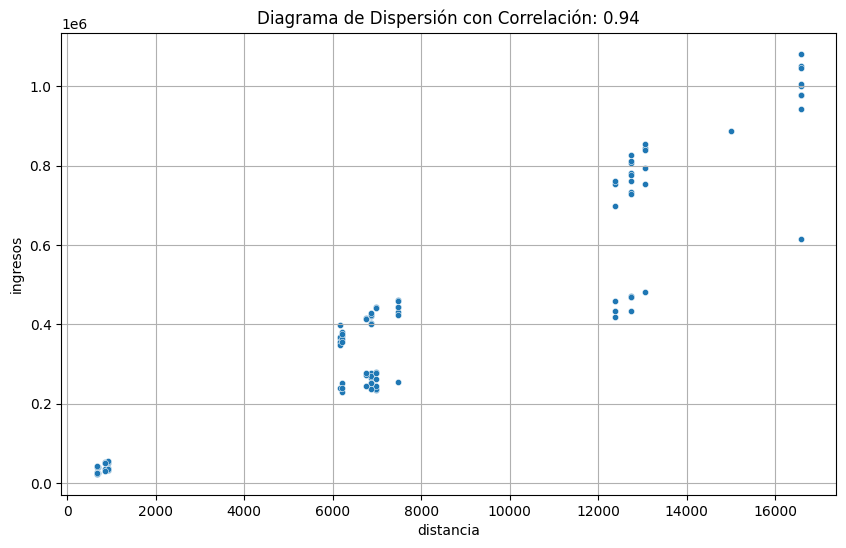

Respuesta TabarAir:


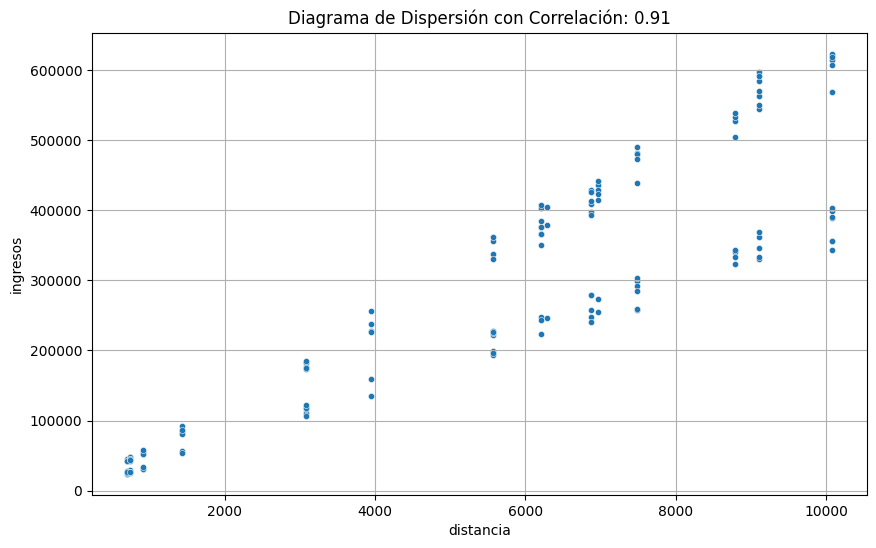

Respuesta MoldaviAir:


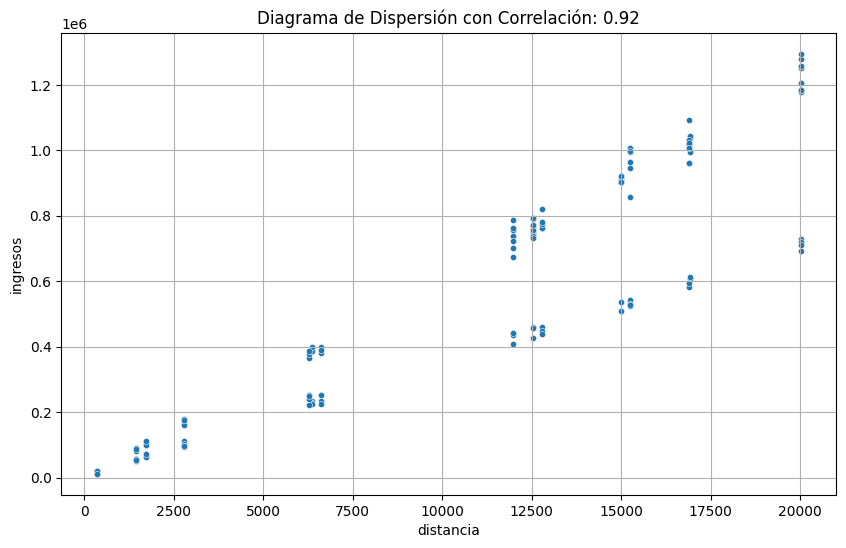

Respuesta PamPangea:


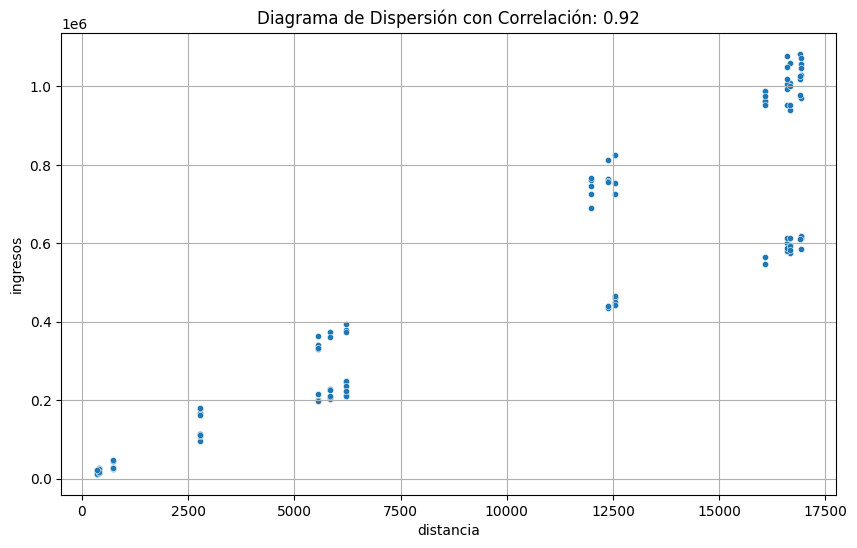

In [224]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

vemos que tienen una correlacion positiva y vemos que hay dos líneas, y la más pequeña puede hacer referencia a los vuelos más cortos y por ello menor distancia. Cabe destacar que tienen más ingresos que los de larga distancia. 

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [214]:
print(df_air_jun["distancia"].max())
print(df_air_jun["distancia"].min())

20029
344


In [220]:
df_air_jun["cat_vuelo"] = pd.cut(df_air_jun["distancia"], 
                                 bins = [0, 5000, 10000, 20000], 
                                 labels=["1", "2", "3"])


In [221]:
col_directora = "aircompany"
col_1 = "ingresos"
col_2 = "cat_vuelo"
diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion


Respuesta Airnar:


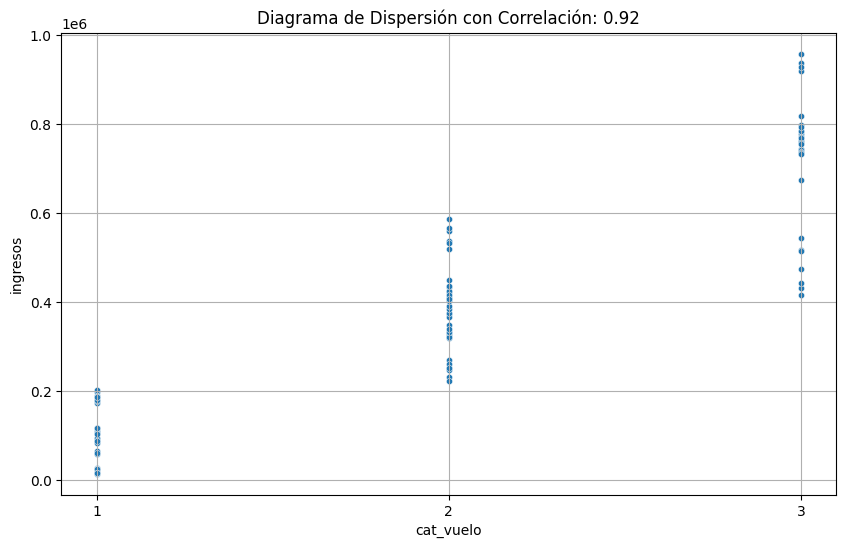

Respuesta FlyQ:


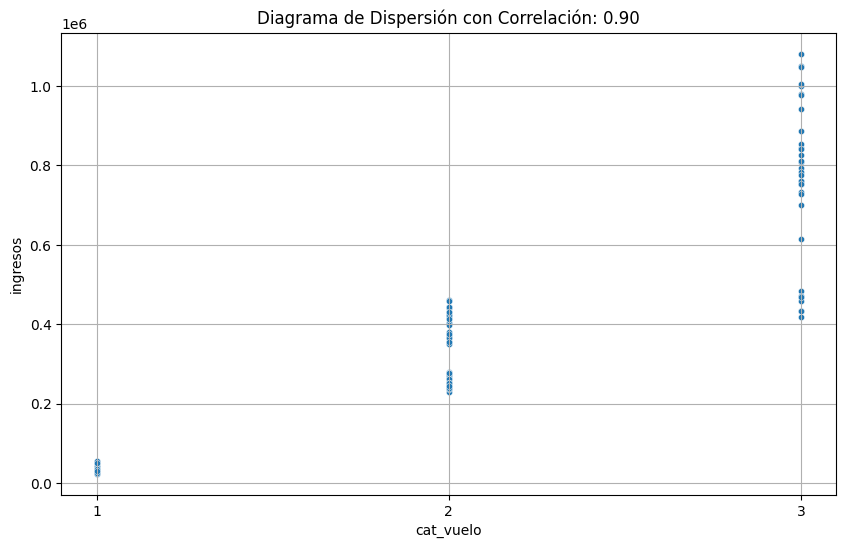

Respuesta TabarAir:


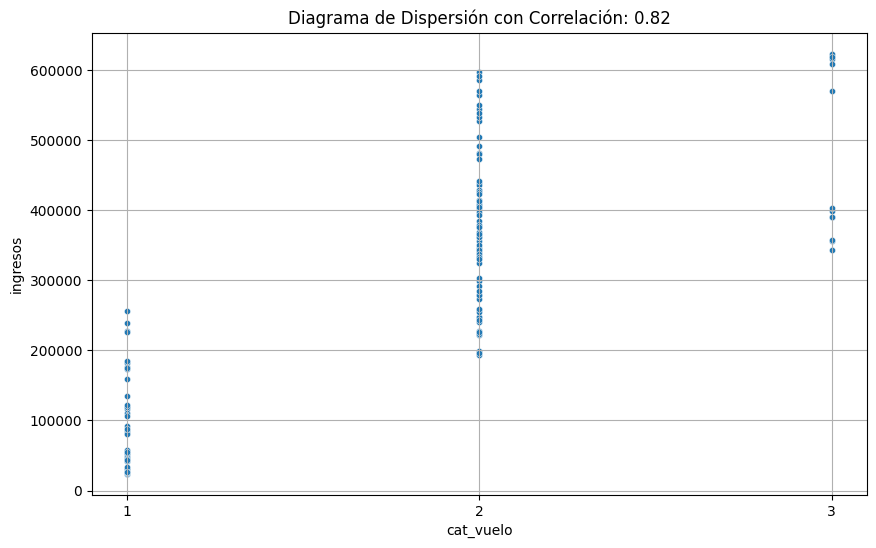

Respuesta MoldaviAir:


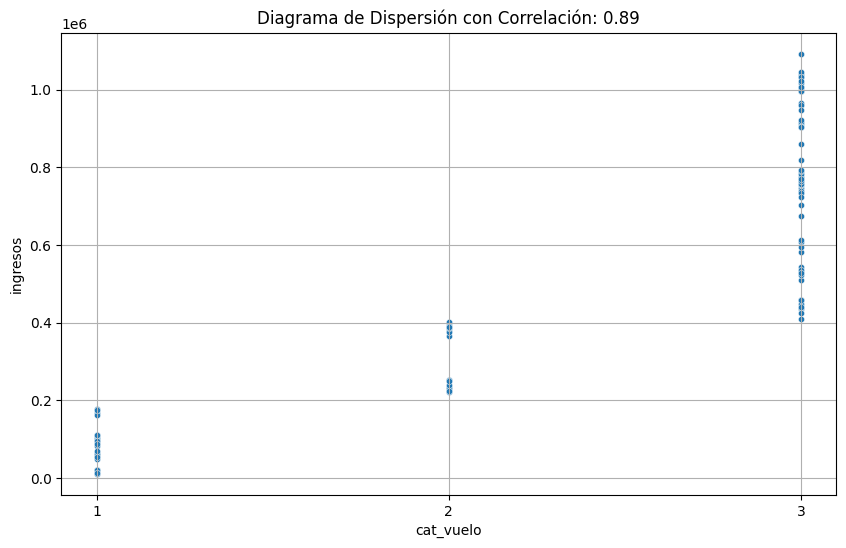

Respuesta PamPangea:


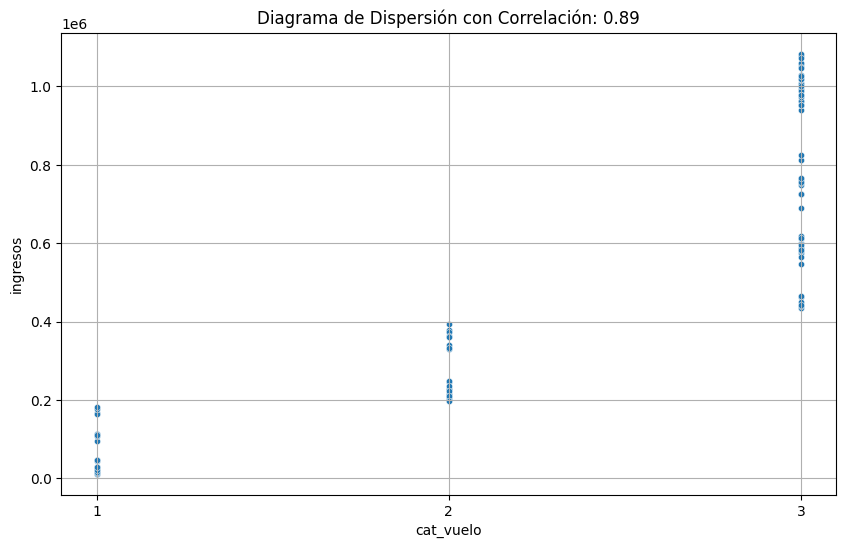

In [222]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

parece que los vuelos de cat 3 que son los largos, son los que tienen mas ingresos. 

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.